# **Time Series Analysis **

### Importing Headers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Importing the dataset

In [ ]:
data = pd.read_csv('temperature.csv', parse_dates=['Date'], index_col='Date')
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


### Visualising the data set

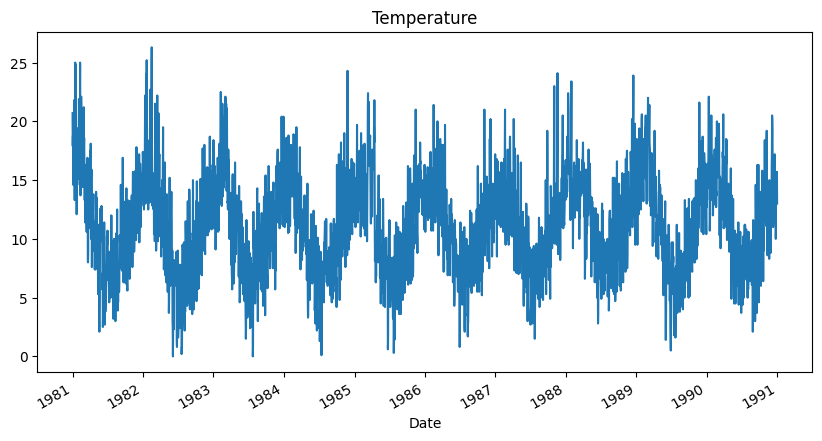

In [ ]:
data['Temp'].plot(title='Temperature', figsize=(10, 5))
plt.show()

### Decomposing the Time Series

In [ ]:
result=seasonal_decompose(data['Temp'], model='additive', period=30)

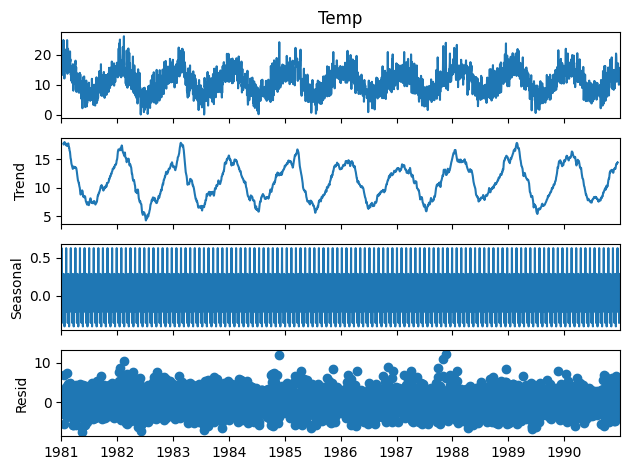

In [ ]:
result.plot()
plt.show()

### Autoregressive(AR) Model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

####  Fit AR model with lag=5


In [ ]:
model_ar = AutoReg(data['Temp'], lags=5).fit()
data['AR_Pred'] = model_ar.predict(start=0, end=len(data)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


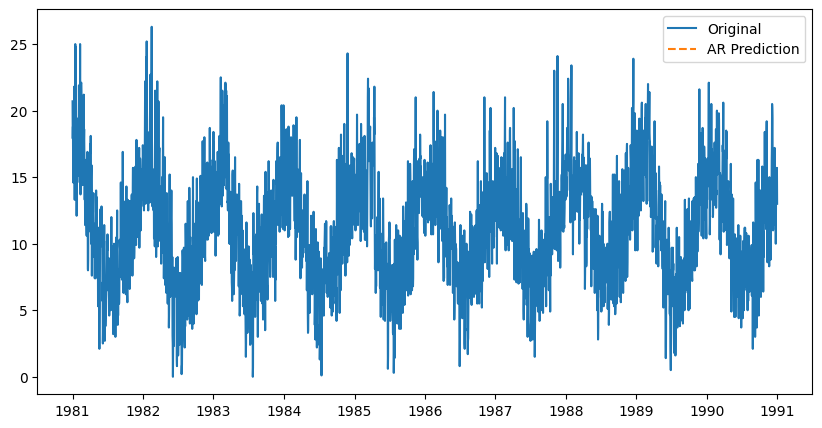

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['AR_Pred'], label='AR Prediction', linestyle='dashed')
plt.legend()
plt.show()

### Moving Average (MA) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#### Fit MA model with q=2


In [ ]:
model_ma = ARIMA(data['Temp'], order=(0, 0, 2)).fit()
data['MA_Pred'] = model_ma.fittedvalues

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


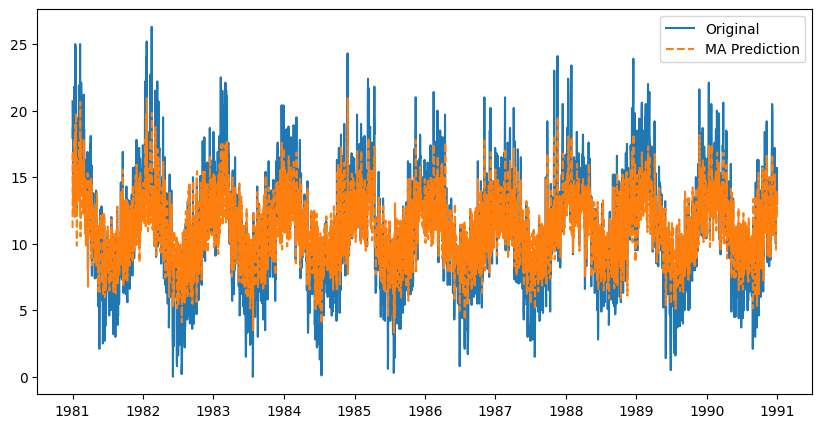

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['MA_Pred'], label='MA Prediction', linestyle='dashed')
plt.legend()
plt.show()

### ARIMA Model

In [ ]:
# Fit ARIMA model with different parameters
model_arima_1 = ARIMA(data['Temp'], order=(1, 1, 1)).fit()
model_arima_2 = ARIMA(data['Temp'], order=(2, 1, 2)).fit()
model_arima_3 = ARIMA(data['Temp'], order=(3, 1, 3)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

#### Store predictions


In [ ]:
data['ARIMA_1_Pred'] = model_arima_1.fittedvalues
data['ARIMA_2_Pred'] = model_arima_2.fittedvalues
data['ARIMA_3_Pred'] = model_arima_3.fittedvalues

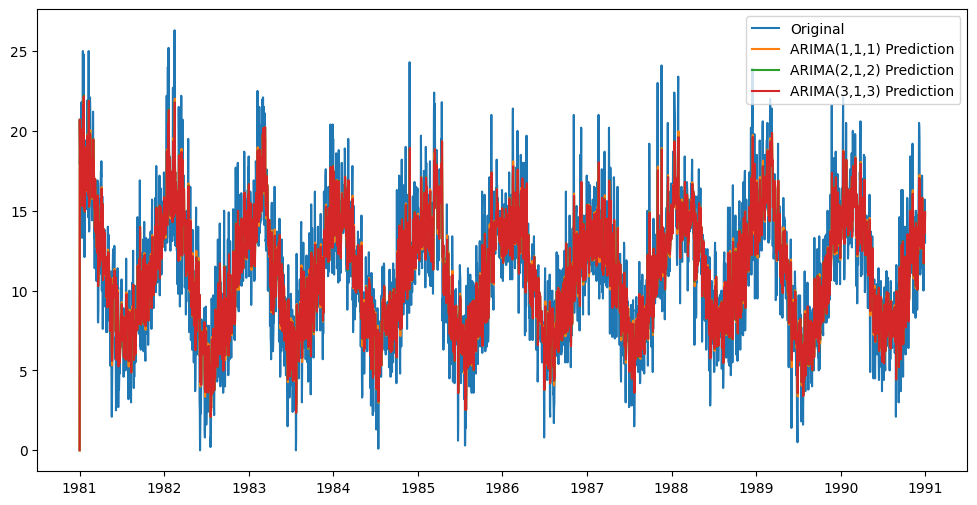

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label='Original')
plt.plot(data['ARIMA_1_Pred'], label='ARIMA(1,1,1) Prediction')
plt.plot(data['ARIMA_2_Pred'], label='ARIMA(2,1,2) Prediction')
plt.plot(data['ARIMA_3_Pred'], label='ARIMA(3,1,3) Prediction')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure the models have been fitted correctly
print("Column names in your DataFrame:", data.columns)

# Check if the prediction columns exist
required_columns = ['MA_Pred', 'ARIMA_1_Pred', 'ARIMA_2_Pred', 'ARIMA_3_Pred']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"Error: The following columns are missing: {', '.join(missing_columns)}")
else:
    # Extract the true values
    y_true = data['Temp']

    # MAE, MSE, RMSE, and R² for Moving Average model (MA_Pred)
    mae_ma = mean_absolute_error(y_true, data['MA_Pred'])
    mse_ma = mean_squared_error(y_true, data['MA_Pred'])
    rmse_ma = np.sqrt(mse_ma)
    r2_ma = r2_score(y_true, data['MA_Pred'])

    # MAE, MSE, RMSE, and R² for ARIMA(1, 1, 1) model (ARIMA_1_Pred)
    mae_arima_1 = mean_absolute_error(y_true, data['ARIMA_1_Pred'])
    mse_arima_1 = mean_squared_error(y_true, data['ARIMA_1_Pred'])
    rmse_arima_1 = np.sqrt(mse_arima_1)
    r2_arima_1 = r2_score(y_true, data['ARIMA_1_Pred'])

    # MAE, MSE, RMSE, and R² for ARIMA(2, 1, 2) model (ARIMA_2_Pred)
    mae_arima_2 = mean_absolute_error(y_true, data['ARIMA_2_Pred'])
    mse_arima_2 = mean_squared_error(y_true, data['ARIMA_2_Pred'])
    rmse_arima_2 = np.sqrt(mse_arima_2)
    r2_arima_2 = r2_score(y_true, data['ARIMA_2_Pred'])

    # MAE, MSE, RMSE, and R² for ARIMA(3, 1, 3) model (ARIMA_3_Pred)
    mae_arima_3 = mean_absolute_error(y_true, data['ARIMA_3_Pred'])
    mse_arima_3 = mean_squared_error(y_true, data['ARIMA_3_Pred'])
    rmse_arima_3 = np.sqrt(mse_arima_3)
    r2_arima_3 = r2_score(y_true, data['ARIMA_3_Pred'])

    # Print the results for all models with 4 decimal places
    print("MAE, MSE, RMSE, and R² for the Moving Average model (MA_Pred):")
    print(f"MAE: {mae_ma:.4f}")
    print(f"MSE: {mse_ma:.4f}")
    print(f"RMSE: {rmse_ma:.4f}")
    print(f"R²: {r2_ma:.4f}")
    print("\n")

    print("MAE, MSE, RMSE, and R² for the ARIMA(1, 1, 1) model (ARIMA_1_Pred):")
    print(f"MAE: {mae_arima_1:.4f}")
    print(f"MSE: {mse_arima_1:.4f}")
    print(f"RMSE: {rmse_arima_1:.4f}")
    print(f"R²: {r2_arima_1:.4f}")
    print("\n")

    print("MAE, MSE, RMSE, and R² for the ARIMA(2, 1, 2) model (ARIMA_2_Pred):")
    print(f"MAE: {mae_arima_2:.4f}")
    print(f"MSE: {mse_arima_2:.4f}")
    print(f"RMSE: {rmse_arima_2:.4f}")
    print(f"R²: {r2_arima_2:.4f}")
    print("\n")

    print("MAE, MSE, RMSE, and R² for the ARIMA(3, 1, 3) model (ARIMA_3_Pred):")
    print(f"MAE: {mae_arima_3:.4f}")
    print(f"MSE: {mse_arima_3:.4f}")
    print(f"RMSE: {rmse_arima_3:.4f}")
    print(f"R²: {r2_arima_3:.4f}")


Column names in your DataFrame: Index(['Temp', 'AR_Pred', 'MA_Pred', 'ARIMA_1_Pred', 'ARIMA_2_Pred',
       'ARIMA_3_Pred'],
      dtype='object')
MAE, MSE, RMSE, and R² for the Moving Average model (MA_Pred):
MAE: 2.2302
MSE: 7.9905
RMSE: 2.8268
R²: 0.5179


MAE, MSE, RMSE, and R² for the ARIMA(1, 1, 1) model (ARIMA_1_Pred):
MAE: 1.9088
MSE: 6.0078
RMSE: 2.4511
R²: 0.6375


MAE, MSE, RMSE, and R² for the ARIMA(2, 1, 2) model (ARIMA_2_Pred):
MAE: 1.9000
MSE: 5.9206
RMSE: 2.4332
R²: 0.6428


MAE, MSE, RMSE, and R² for the ARIMA(3, 1, 3) model (ARIMA_3_Pred):
MAE: 1.9004
MSE: 5.9199
RMSE: 2.4331
R²: 0.6428


### SARIMA Model

#### Importing Headers

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [ ]:
sarima_model = SARIMAX(data['Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
data['SARIMA_Pred'] = sarima_model.fittedvalues

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


###  Plot original and SARIMA prediction


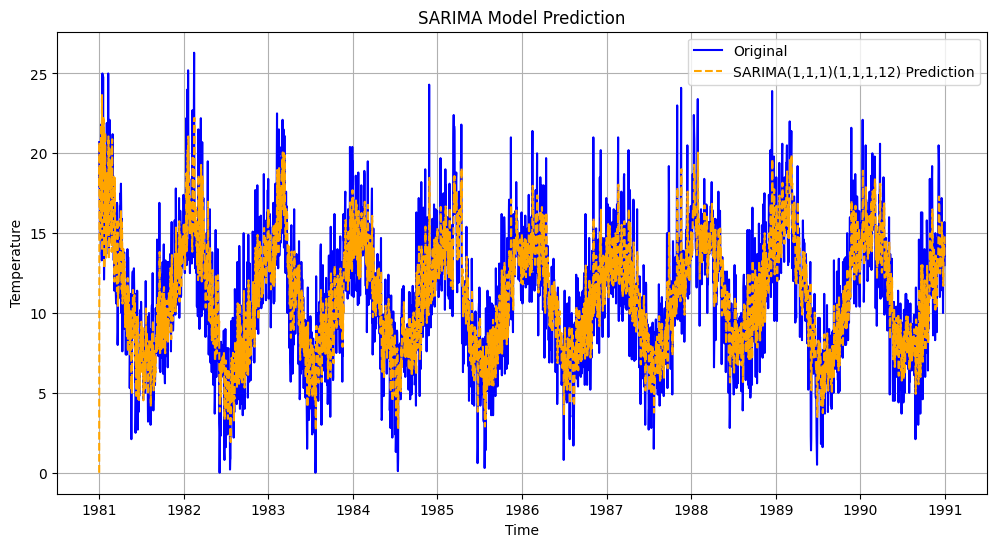

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label='Original', color='blue')
plt.plot(data['SARIMA_Pred'], label='SARIMA(1,1,1)(1,1,1,12) Prediction')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE (SARIMA): 1.9395
MSE (SARIMA): 6.1777
RMSE (SARIMA): 2.4855
R² (SARIMA): 0.6273


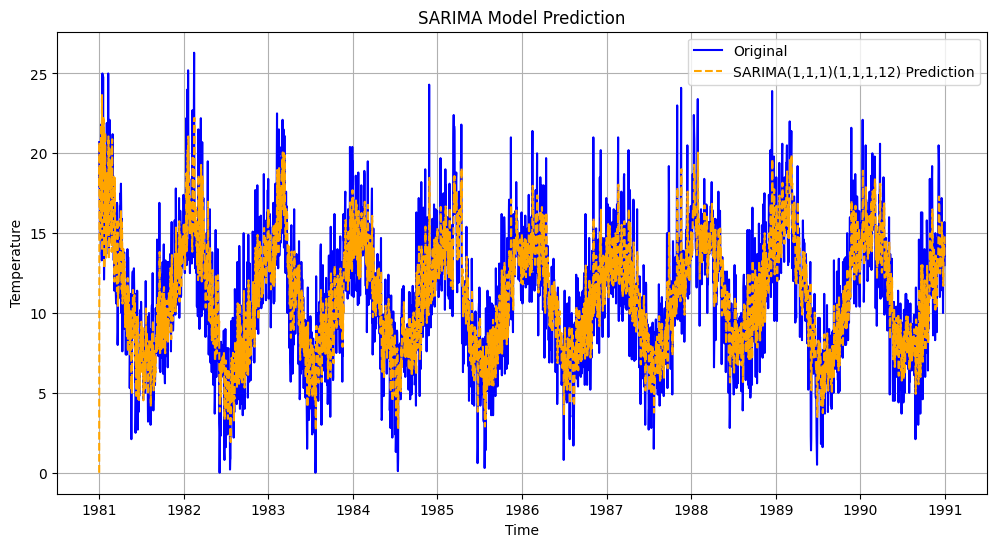

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(data['Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Add SARIMA predictions to the DataFrame
data['SARIMA_Pred'] = sarima_model.fittedvalues

# Calculate RMSE, MAE, MSE, and R²
y_true = data['Temp']  # Actual values
y_pred = data['SARIMA_Pred']  # Predicted values from the SARIMA model

# MAE (Mean Absolute Error)
mae_sarima = mean_absolute_error(y_true, y_pred)

# MSE (Mean Squared Error)
mse_sarima = mean_squared_error(y_true, y_pred)

# RMSE (Root Mean Squared Error)
rmse_sarima = np.sqrt(mse_sarima)

# R² (R-squared)
r2_sarima = r2_score(y_true, y_pred)

# Print the results
print(f"MAE (SARIMA): {mae_sarima:.4f}")
print(f"MSE (SARIMA): {mse_sarima:.4f}")
print(f"RMSE (SARIMA): {rmse_sarima:.4f}")
print(f"R² (SARIMA): {r2_sarima:.4f}")

# Plotting the SARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label='Original', color='blue')
plt.plot(data['SARIMA_Pred'], label='SARIMA(1,1,1)(1,1,1,12) Prediction', color='orange', linestyle='--')
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE (SARIMA): 1.9301
MSE (SARIMA): 6.0877
RMSE (SARIMA): 2.4673
R² (SARIMA): 0.6327


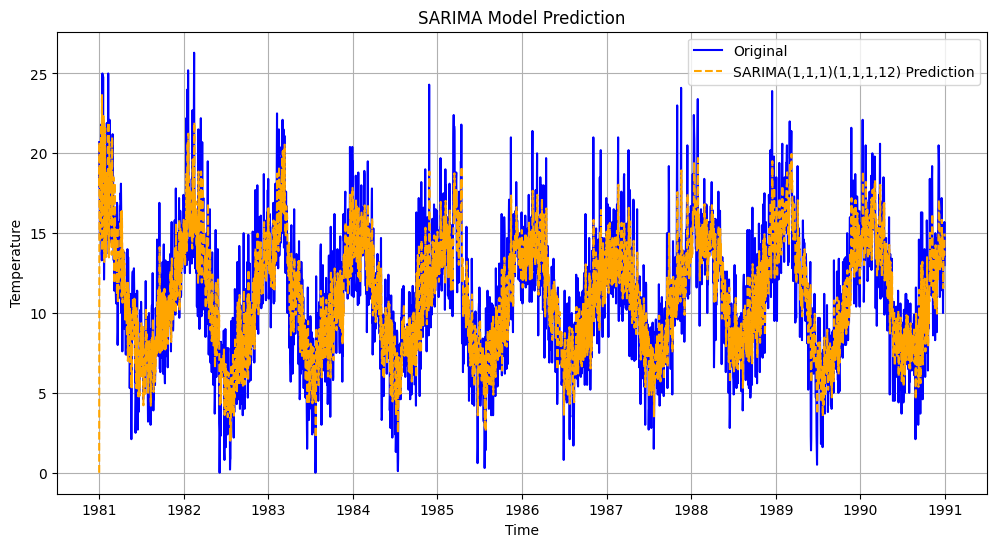

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming your 'data' DataFrame already has a 'Temp' column with temperature data

# Fit the SARIMA model
sarima_model = SARIMAX(data['Temp'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()

# Add SARIMA predictions to the DataFrame
data['SARIMA_Pred'] = sarima_model.fittedvalues

# Calculate RMSE, MAE, MSE, and R²
y_true = data['Temp']  # Actual values
y_pred = data['SARIMA_Pred']  # Predicted values from the SARIMA model

# MAE (Mean Absolute Error)
mae_sarima = mean_absolute_error(y_true, y_pred)

# MSE (Mean Squared Error)
mse_sarima = mean_squared_error(y_true, y_pred)

# RMSE (Root Mean Squared Error)
rmse_sarima = np.sqrt(mse_sarima)

# R² (R-squared)
r2_sarima = r2_score(y_true, y_pred)

# Print the results
print(f"MAE (SARIMA): {mae_sarima:.4f}")
print(f"MSE (SARIMA): {mse_sarima:.4f}")
print(f"RMSE (SARIMA): {rmse_sarima:.4f}")
print(f"R² (SARIMA): {r2_sarima:.4f}")

# Plotting the SARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label='Original', color='blue')
plt.plot(data['SARIMA_Pred'], label='SARIMA(1,1,1)(1,1,1,12) Prediction', color='orange', linestyle='--')
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE (SARIMA): 1.9305
MSE (SARIMA): 6.0870
RMSE (SARIMA): 2.4672
R² (SARIMA): 0.6328


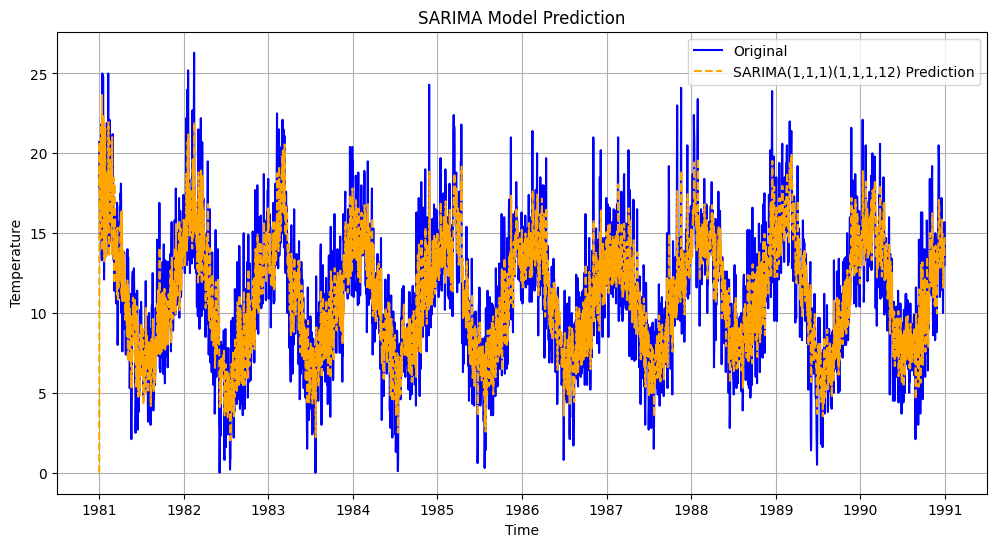

In [ ]:
# Fit the SARIMA model
sarima_model = SARIMAX(data['Temp'], order=(3, 1, 3), seasonal_order=(1, 1, 1, 12)).fit()

# Add SARIMA predictions to the DataFrame
data['SARIMA_Pred'] = sarima_model.fittedvalues

# Calculate RMSE, MAE, MSE, and R²
y_true = data['Temp']  # Actual values
y_pred = data['SARIMA_Pred']  # Predicted values from the SARIMA model

# MAE (Mean Absolute Error)
mae_sarima = mean_absolute_error(y_true, y_pred)

# MSE (Mean Squared Error)
mse_sarima = mean_squared_error(y_true, y_pred)

# RMSE (Root Mean Squared Error)
rmse_sarima = np.sqrt(mse_sarima)

# R² (R-squared)
r2_sarima = r2_score(y_true, y_pred)

# Print the results
print(f"MAE (SARIMA): {mae_sarima:.4f}")
print(f"MSE (SARIMA): {mse_sarima:.4f}")
print(f"RMSE (SARIMA): {rmse_sarima:.4f}")
print(f"R² (SARIMA): {r2_sarima:.4f}")

# Plotting the SARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label='Original', color='blue')
plt.plot(data['SARIMA_Pred'], label='SARIMA(1,1,1)(1,1,1,12) Prediction', color='orange', linestyle='--')
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from prettytable import PrettyTable

# Create a PrettyTable instance
table = PrettyTable()

# Define the table field names (column headers)
table.field_names = ["Model", "MAE", "MSE", "RMSE", "R²"]

# Add the rows for each model
table.add_row(["MA (Moving Average)", "2.2302", "7.9905", "2.8268", "0.5179"])
table.add_row(["ARIMA(1,1,1)", "1.9088", "6.0078", "2.4511", "0.6375"])
table.add_row(["ARIMA(2,1,2)", "1.9000", "5.9206", "2.4332", "0.6428"])
table.add_row(["ARIMA(3,1,3)", "1.9004", "5.9199", "2.4331", "0.6428"])
table.add_row(["SARIMA(1,1,1)", "1.9395", "6.1777", "2.4855", "0.6273"])
table.add_row(["SARIMA(2,1,2)", "1.9301", "6.0877", "2.4673", "0.6327"])
table.add_row(["SARIMA(3,1,3)", "1.9305", "6.0870", "2.4672", "0.6328"])

# Print the table
print(table)


+---------------------+--------+--------+--------+--------+
|        Model        |  MAE   |  MSE   |  RMSE  |   R²   |
+---------------------+--------+--------+--------+--------+
| MA (Moving Average) | 2.2302 | 7.9905 | 2.8268 | 0.5179 |
|     ARIMA(1,1,1)    | 1.9088 | 6.0078 | 2.4511 | 0.6375 |
|     ARIMA(2,1,2)    | 1.9000 | 5.9206 | 2.4332 | 0.6428 |
|     ARIMA(3,1,3)    | 1.9004 | 5.9199 | 2.4331 | 0.6428 |
|    SARIMA(1,1,1)    | 1.9395 | 6.1777 | 2.4855 | 0.6273 |
|    SARIMA(2,1,2)    | 1.9301 | 6.0877 | 2.4673 | 0.6327 |
|    SARIMA(3,1,3)    | 1.9305 | 6.0870 | 2.4672 | 0.6328 |
+---------------------+--------+--------+--------+--------+


## **Result :-**


Thus the Python program to perform time series analysis and evaluate ARIMA and SARIMA models using different parameters had been executed successfully.